### Read Data and Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('../data/AAPL.csv',index_col=0,parse_dates=[0])
print(df.shape)
print("")
print(df.head())
print("")
print(df.dtypes)

(10530, 6)

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094820  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087861  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090035   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092646   73449600
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.098300   48630400

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


We have 10530 rows and 6 features in this dataset.

**Check missing values and Fill in time gaps**

In [2]:
df.isnull().values.sum()

0

In [3]:
# Fill in Date Gap with NaN
df = df.resample('1D').mean()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600.0
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098300,48630400.0
...,...,...,...,...,...,...
2022-09-15,154.649994,155.240005,151.380005,152.369995,152.369995,90481100.0
2022-09-16,151.210007,151.350006,148.369995,150.699997,150.699997,162157000.0
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN


After filling the date gaps, we have 15254 rows.

### Exploratory Data Analysis

**Take a look at the distribution of each feature**

In [4]:
# Feature 'Open'
df['Open'].describe()

count    10530.000000
mean        15.599898
std         33.624886
min          0.049665
25%          0.285714
50%          0.480045
75%         15.422232
max        182.630005
Name: Open, dtype: float64

In [5]:
# Feature 'High'
df['High'].describe()

count    10530.000000
mean        15.774165
std         34.022618
min          0.049665
25%          0.291295
50%          0.488839
75%         15.558303
max        182.940002
Name: High, dtype: float64

In [6]:
# Feature 'Low'
df['Low'].describe()

count    10530.000000
mean        15.427911
std         33.240282
min          0.049107
25%          0.277902
50%          0.471205
75%         15.274911
max        179.119995
Name: Low, dtype: float64

In [7]:
# Feature 'Adj Close'
df['Adj Close'].describe()

count    10530.000000
mean        14.958183
std         33.344906
min          0.038276
25%          0.236786
50%          0.396429
75%         13.365451
max        181.259918
Name: Adj Close, dtype: float64

In [8]:
# Feature 'Volume'
df['Volume'].describe()

count    1.053000e+04
mean     3.293018e+08
std      3.384208e+08
min      0.000000e+00
25%      1.226008e+08
50%      2.169244e+08
75%      4.084710e+08
max      7.421641e+09
Name: Volume, dtype: float64

In [9]:
# Target Variable 'Close'
df['Close'].describe()

count    10530.000000
mean        15.607666
std         33.647836
min          0.049107
25%          0.285224
50%          0.479911
75%         15.376875
max        182.009995
Name: Close, dtype: float64

**Histogram of the target variable (Close)**

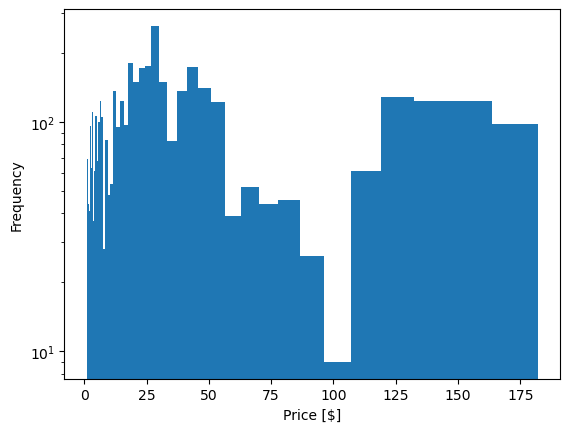

In [10]:
# Histogram of 'Close'
df['Close'].plot.hist(log = True, bins = np.logspace(np.log10(1),np.log10(np.max(df['Close']))))
plt.xlabel('Price [$]')
plt.ylabel('Frequency')
plt.savefig('../figures/close_freq.png',dpi=300)
plt.show()

**AAPL Stock Close Price Trend Over 40 Years**

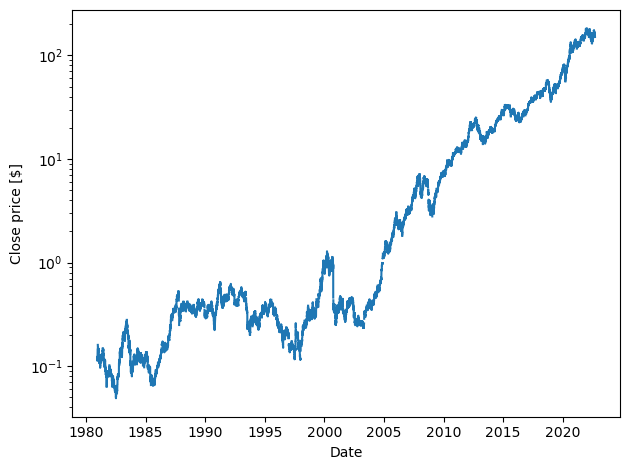

In [11]:
plt.plot(df['Close']) 
plt.xlabel('Date')
plt.ylabel('Close price [$]')
plt.semilogy() 
plt.tight_layout()
plt.savefig('../figures/close_trend_all.png',dpi=300)
plt.show()

**Scatter plots among features and the target variable**

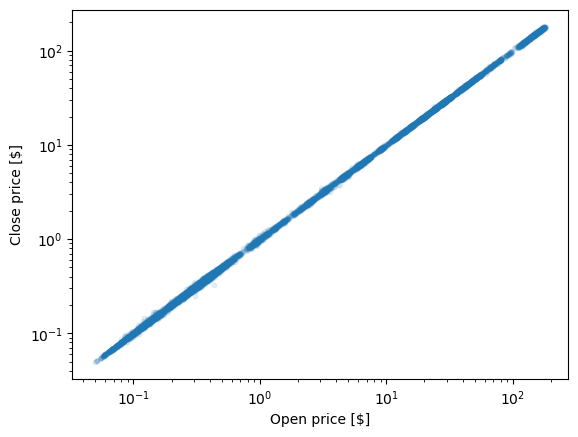

In [12]:
# Open and Close prices in a day are highly related
df.plot.scatter('Open','Close',s = 10,alpha = 0.1)
plt.semilogx() 
plt.semilogy() 
plt.xlabel('Open price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_open.png',dpi=300)
plt.show()

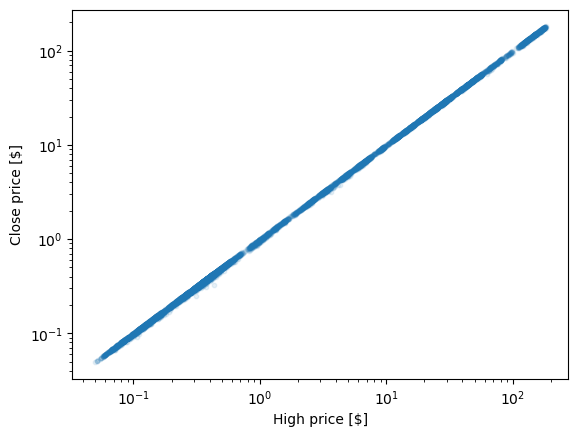

In [13]:
# High and Close prices in a day are highly related
df.plot.scatter('High','Close',s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('High price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_high.png',dpi=300)
plt.show()

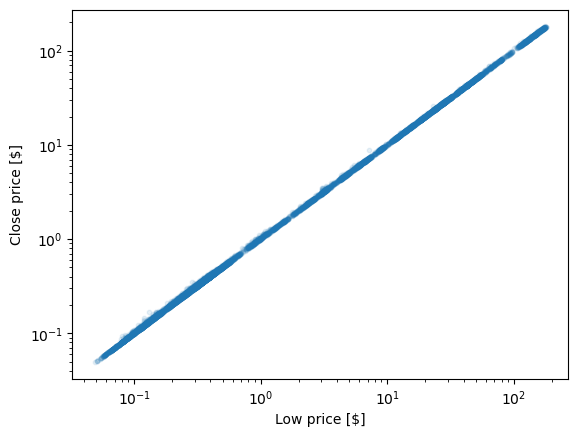

In [14]:
# Low and Close prices in a day are highly related
df.plot.scatter('Low','Close',s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('Low price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_low.png',dpi=300)
plt.show()

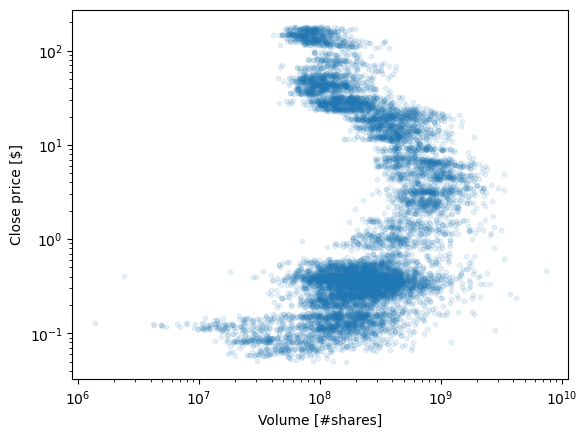

In [15]:
# scatter plot for volume and close
df.plot.scatter('Volume','Close', s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('Volume [#shares]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_vol.png',dpi=300)
plt.show()

People are most likely to sell stocks when the price is within the medium range.

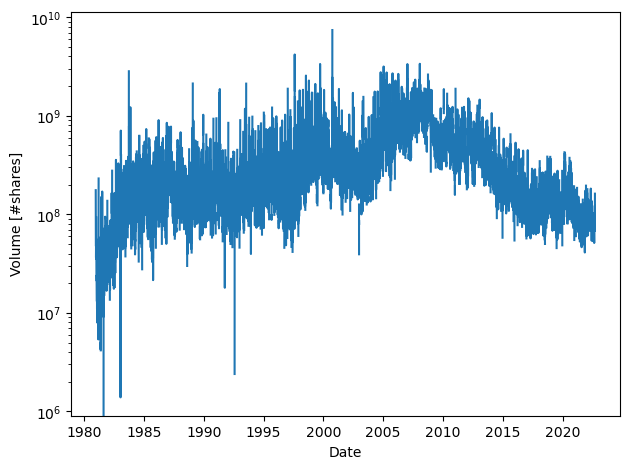

In [16]:
plt.plot(df['Volume']) 
plt.semilogy()
plt.xlabel('Date')
plt.ylabel('Volume [#shares]')
plt.tight_layout()
plt.savefig('../figures/vol_trend_all.png',dpi=300)
plt.show()

**On some days, volumes are extremely high. Let's take a look.**

**2000-09-29: Apple's Highest Volume in History**

In [17]:
print(df.loc[df[['Volume']].idxmax()])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-09-29  0.503348  0.517857  0.453125  0.459821    0.39261  7.421641e+09


**Let's see the price trend in that week**

In [18]:
print(df.loc['2000-09-25':'2000-09-29'])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-09-25  0.941964  0.991071  0.929688  0.955357   0.815714  4.355512e+08
2000-09-26  0.952009  0.977679  0.917411  0.918527   0.784268  2.909368e+08
2000-09-27  0.924107  0.941964  0.861607  0.873884   0.746150  4.022592e+08
2000-09-28  0.880580  0.960938  0.859375  0.955357   0.815714  9.795856e+08
2000-09-29  0.503348  0.517857  0.453125  0.459821   0.392610  7.421641e+09


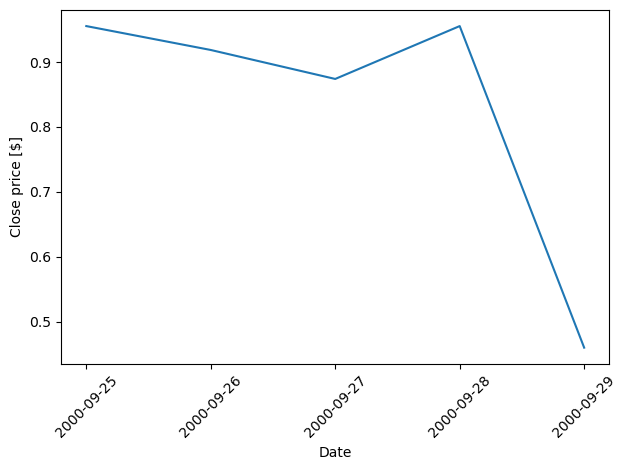

In [19]:
Last_week_Sep_2000 = df.loc['2000-09-25':'2000-09-29']

plt.plot(Last_week_Sep_2000['Close'])
plt.xlabel('Date')
plt.xticks(['2000-09-25', '2000-09-26', '2000-09-27', '2000-09-28','2000-09-29'], rotation=45)
plt.ylabel('Close price [$]')
plt.tight_layout()
plt.savefig('../figures/price_plunge_2000.png',dpi=300)
plt.show()

**Apple's stock price sliced in half in that week, hence causing the volume to increase.**

**Volumes are exceptionally high during economic recession**
- 1997 Asian Financial Crisis
- Financial crisis of 2007–2008

In [20]:
print(df[df['Volume']>=3300000000])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
1997-08-06  0.225446  0.247768  0.223214  0.234933   0.200593  4.190480e+09
1997-08-07  0.256696  0.263951  0.253348  0.260603   0.222511  3.755438e+09
1999-09-21  0.653460  0.654018  0.616071  0.618304   0.527928  3.357558e+09
2000-09-29  0.503348  0.517857  0.453125  0.459821   0.392610  7.421641e+09
2007-01-09  3.087500  3.320714  3.041071  3.306071   2.822829  3.349298e+09
2008-01-23  4.863929  5.000000  4.505000  4.966786   4.240800  3.372970e+09


**Autocorrelation Plot in lag days**

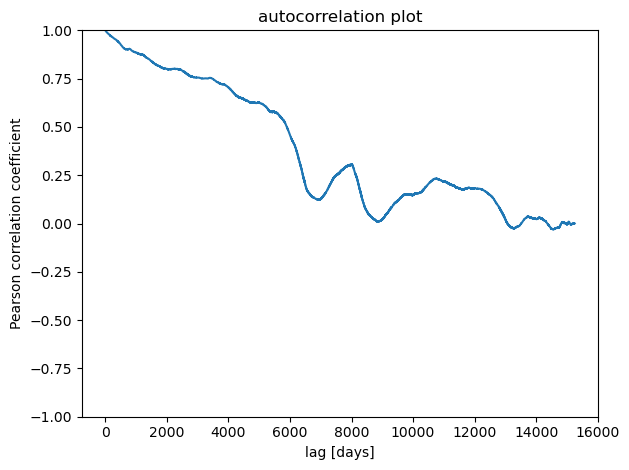

In [22]:
lags = np.arange(df.shape[0])
corr_coefs = np.zeros(df.shape[0])

for i in np.arange(len(lags)):
    x = df['Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Close'].shape[0]
# print(corr_coefs[:10])

plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]')
plt.ylabel('Pearson correlation coefficient')
plt.title('autocorrelation plot')
plt.tight_layout()
plt.savefig('../figures/autocor_days.png',dpi=300)
plt.show()

**Autocorrelation plot in year**

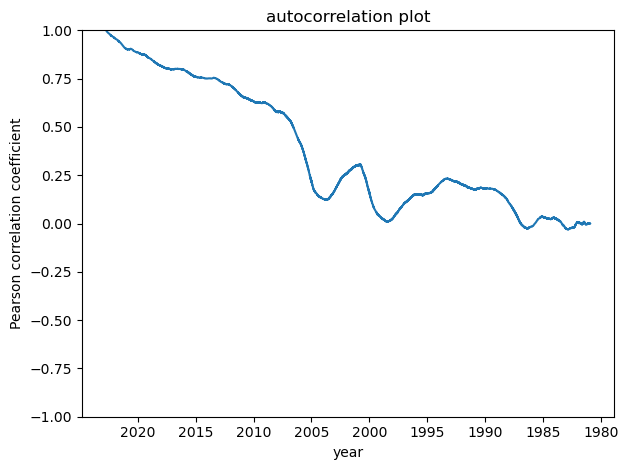

In [23]:
lags = np.arange(df.shape[0])
years = df.index

corr_coefs = np.zeros(df.shape[0])

for i in np.arange(len(lags)):
    x = df['Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Close'].shape[0]
# print(corr_coefs[:10])


plt.plot(years[2:],corr_coefs[len(corr_coefs):1:-1])
plt.gca().invert_xaxis()
plt.ylim([-1,1])
plt.xlabel('year')
plt.ylabel('Pearson correlation coefficient')
plt.title('autocorrelation plot')
plt.tight_layout()
plt.savefig('../figures/autocor_year.png',dpi=300)
plt.show()

### Create a feature matrix for each feature with lag_days = 10

**Open**

In [24]:
# Get the opening price of previous days to make a feature matrix
lag_days = 10

column_names = []
for i in range(lag_days,1,-1):
    column_names.append(str(i).join(['lag_','_days']))

column_names.append(str(1).join(['lag_','_day']))

df_lag_10_open = pd.concat([df['Open'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_open.columns = column_names

print(df_lag_10_open.tail(10))
print("")
print(df_lag_10_open.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   160.309998  156.639999  159.750000         NaN         NaN   
2022-09-11   156.639999  159.750000         NaN         NaN         NaN   
2022-09-12   159.750000         NaN         NaN         NaN  156.470001   
2022-09-13          NaN         NaN         NaN  156.470001  154.820007   
2022-09-14          NaN         NaN  156.470001  154.820007  154.639999   
2022-09-15          NaN  156.470001  154.820007  154.639999  155.470001   
2022-09-16   156.470001  154.820007  154.639999  155.470001         NaN   
2022-09-17   154.820007  154.639999  155.470001         NaN         NaN   
2022-09-18   154.639999  155.470001         NaN         NaN  159.589996   
2022-09-19   155.470001         NaN         NaN  159.589996  159.899994   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**High**

In [25]:
# Get the high price of previous days to make a feature matrix
df_lag_10_high = pd.concat([df['High'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_high.columns = column_names

print(df_lag_10_high.tail(10))
print("")
print(df_lag_10_high.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   160.580002  158.419998  160.360001         NaN         NaN   
2022-09-11   158.419998  160.360001         NaN         NaN         NaN   
2022-09-12   160.360001         NaN         NaN         NaN  157.089996   
2022-09-13          NaN         NaN         NaN  157.089996  156.669998   
2022-09-14          NaN         NaN  157.089996  156.669998  156.360001   
2022-09-15          NaN  157.089996  156.669998  156.360001  157.820007   
2022-09-16   157.089996  156.669998  156.360001  157.820007         NaN   
2022-09-17   156.669998  156.360001  157.820007         NaN         NaN   
2022-09-18   156.360001  157.820007         NaN         NaN  164.259995   
2022-09-19   157.820007         NaN         NaN  164.259995  160.539993   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Low**

In [26]:
# Get the low price of previous days to make a feature matrix
df_lag_10_low = pd.concat([df['Low'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_low.columns = column_names

print(df_lag_10_low.tail(10))
print("")
print(df_lag_10_low.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.139999  154.669998  154.970001         NaN         NaN   
2022-09-11   154.669998  154.970001         NaN         NaN         NaN   
2022-09-12   154.970001         NaN         NaN         NaN  153.690002   
2022-09-13          NaN         NaN         NaN  153.690002  153.610001   
2022-09-14          NaN         NaN  153.690002  153.610001  152.679993   
2022-09-15          NaN  153.690002  153.610001  152.679993  154.750000   
2022-09-16   153.690002  153.610001  152.679993  154.750000         NaN   
2022-09-17   153.610001  152.679993  154.750000         NaN         NaN   
2022-09-18   152.679993  154.750000         NaN         NaN  159.300003   
2022-09-19   154.750000         NaN         NaN  159.300003  153.369995   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Adj Close**

In [27]:
# Get the adj_close price of previous days to make a feature matrix
df_lag_10_adj = pd.concat([df['Adj Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_adj.columns = column_names

print(df_lag_10_adj.tail(10))
print("")
print(df_lag_10_adj.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.220001  157.960007  155.809998         NaN         NaN   
2022-09-11   157.960007  155.809998         NaN         NaN         NaN   
2022-09-12   155.809998         NaN         NaN         NaN  154.529999   
2022-09-13          NaN         NaN         NaN  154.529999  155.960007   
2022-09-14          NaN         NaN  154.529999  155.960007  154.460007   
2022-09-15          NaN  154.529999  155.960007  154.460007  157.369995   
2022-09-16   154.529999  155.960007  154.460007  157.369995         NaN   
2022-09-17   155.960007  154.460007  157.369995         NaN         NaN   
2022-09-18   154.460007  157.369995         NaN         NaN  163.429993   
2022-09-19   157.369995         NaN         NaN  163.429993  153.839996   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Close**

In [28]:
# Get the closing price of previous days to make a feature matrix
df_lag_10_close = pd.concat([df['Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_close.columns = column_names

print(df_lag_10_close.tail(10))
print("")
print(df_lag_10_close.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.220001  157.960007  155.809998         NaN         NaN   
2022-09-11   157.960007  155.809998         NaN         NaN         NaN   
2022-09-12   155.809998         NaN         NaN         NaN  154.529999   
2022-09-13          NaN         NaN         NaN  154.529999  155.960007   
2022-09-14          NaN         NaN  154.529999  155.960007  154.460007   
2022-09-15          NaN  154.529999  155.960007  154.460007  157.369995   
2022-09-16   154.529999  155.960007  154.460007  157.369995         NaN   
2022-09-17   155.960007  154.460007  157.369995         NaN         NaN   
2022-09-18   154.460007  157.369995         NaN         NaN  163.429993   
2022-09-19   157.369995         NaN         NaN  163.429993  153.839996   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Volume**

In [29]:
# Get the volume of previous days to make a feature matrix
df_lag_10_vol = pd.concat([df['Volume'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_10_vol.columns = column_names

print(df_lag_10_vol.tail(10))
print("")
print(df_lag_10_vol.shape)

            lag_10_days  lag_9_days  lag_8_days   lag_7_days   lag_6_days  \
Date                                                                        
2022-09-10   87991100.0  74229900.0  76905200.0          NaN          NaN   
2022-09-11   74229900.0  76905200.0         NaN          NaN          NaN   
2022-09-12   76905200.0         NaN         NaN          NaN   73714800.0   
2022-09-13          NaN         NaN         NaN   73714800.0   87449600.0   
2022-09-14          NaN         NaN  73714800.0   87449600.0   84923800.0   
2022-09-15          NaN  73714800.0  87449600.0   84923800.0   68028800.0   
2022-09-16   73714800.0  87449600.0  84923800.0   68028800.0          NaN   
2022-09-17   87449600.0  84923800.0  68028800.0          NaN          NaN   
2022-09-18   84923800.0  68028800.0         NaN          NaN  104956000.0   
2022-09-19   68028800.0         NaN         NaN  104956000.0  122656600.0   

             lag_5_days   lag_4_days   lag_3_days   lag_2_days    lag_1_day

**Merge the dataframes to complete the feature matrix**

In [31]:
feat_mat = df_lag_10_vol.merge(df["Close"],how='right',on='Date')
feat_mat = df_lag_10_adj.merge(feat_mat,how='right',on='Date',suffixes=('_adj','_vol'))

feat_mat = df_lag_10_close.merge(feat_mat,how='right',on='Date')
feat_mat = df_lag_10_low.merge(feat_mat,how='right',on='Date',suffixes=('_low','_close'))

feat_mat = df_lag_10_high.merge(feat_mat,how='right',on='Date')
feat_mat = df_lag_10_open.merge(feat_mat,how='right',on='Date',suffixes=('_open','_high'))

print(feat_mat.columns)
print(feat_mat)

Index(['lag_10_days_open', 'lag_9_days_open', 'lag_8_days_open',
       'lag_7_days_open', 'lag_6_days_open', 'lag_5_days_open',
       'lag_4_days_open', 'lag_3_days_open', 'lag_2_days_open',
       'lag_1_day_open', 'lag_10_days_high', 'lag_9_days_high',
       'lag_8_days_high', 'lag_7_days_high', 'lag_6_days_high',
       'lag_5_days_high', 'lag_4_days_high', 'lag_3_days_high',
       'lag_2_days_high', 'lag_1_day_high', 'lag_10_days_low',
       'lag_9_days_low', 'lag_8_days_low', 'lag_7_days_low', 'lag_6_days_low',
       'lag_5_days_low', 'lag_4_days_low', 'lag_3_days_low', 'lag_2_days_low',
       'lag_1_day_low', 'lag_10_days_close', 'lag_9_days_close',
       'lag_8_days_close', 'lag_7_days_close', 'lag_6_days_close',
       'lag_5_days_close', 'lag_4_days_close', 'lag_3_days_close',
       'lag_2_days_close', 'lag_1_day_close', 'lag_10_days_adj',
       'lag_9_days_adj', 'lag_8_days_adj', 'lag_7_days_adj', 'lag_6_days_adj',
       'lag_5_days_adj', 'lag_4_days_adj', 'lag_3_d

### Splitting data

**Split the dataset with a train-val-test ratio of 60%-20%-20%**

In [32]:
from sklearn.model_selection import train_test_split 

X = feat_mat.drop(columns = ['Close'])
y = feat_mat['Close']

# print(X)
# print(y)

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = 0.6, shuffle = False)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
# print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, shuffle = False)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.tail())
print(y_train.tail())

# print(X_val.head())
# print(y_val.head())

# print(X_test.head())
# print(y_test.head())

training set: (9152, 60) (9152,)
validation set: (3051, 60) (3051,)
test set: (3051, 60) (3051,)
            lag_10_days_open  lag_9_days_open  lag_8_days_open  \
Date                                                             
2005-12-31          2.592857         2.639643         2.648929   
2006-01-01          2.639643         2.648929              NaN   
2006-01-02          2.648929              NaN              NaN   
2006-01-03               NaN              NaN              NaN   
2006-01-04               NaN              NaN         2.642857   

            lag_7_days_open  lag_6_days_open  lag_5_days_open  \
Date                                                            
2005-12-31              NaN              NaN              NaN   
2006-01-01              NaN              NaN         2.642857   
2006-01-02              NaN         2.642857         2.659643   
2006-01-03         2.642857         2.659643         2.635000   
2006-01-04         2.659643         2.635000      

### Preprocessing

**Preprocess all features with standard scaler**

In [33]:
from sklearn.preprocessing import StandardScaler

# print(feat_mat.columns[:-1])

std_ftrs = feat_mat.columns[:-1]

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train[std_ftrs])
X_val_sc = scaler.transform(X_val[std_ftrs])
X_test_sc = scaler.transform(X_test[std_ftrs])

print(X_train_sc)
# print(X_val_sc)
# print(X_test_sc)

[[        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan         nan ...         nan         nan
  -0.34925663]
 [        nan         nan         nan ...         nan -0.3490305
  -0.5944969 ]
 ...
 [ 6.82326122         nan         nan ...  1.21862459         nan
          nan]
 [        nan         nan         nan ...         nan         nan
          nan]
 [        nan         nan  6.77970161 ...         nan         nan
   1.85769047]]
